<a href="https://colab.research.google.com/github/yqz5514/Reg-Stats-Coding-Project/blob/main/Cumulative_Economically_Significant_Final_Rules_by_Administration_demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download files

In [1]:
install.packages("R.utils")
library("R.utils")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.2 (2022-11-11 22:00:03 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, warnings




In [2]:
# download ES rules published data
download.file("https://raw.githubusercontent.com/yqz5514/Reg-Stats-Coding-Project/main/data/Cumulative_ES_rules_published_months_in_office_071023.csv",
              "Cumulative_ES_rules_published_months_in_office_071023.csv.gz")
gunzip('Cumulative_ES_rules_published_months_in_office_071023.csv.gz')


In [3]:
# Dowloading logo and font style for reg stats plots
download.file("https://raw.githubusercontent.com/yqz5514/Reg-Stats-Coding-Project/main/gw_ci_rsc_2cs_pos.png",
              "gw_ci_rsc_2cs_pos.png.gz")
download.file("https://github.com/yqz5514/Reg-Stats-Coding-Project/raw/main/a-avenir-next-lt-pro.otf",
              "a-avenir-next-lt-pro.otf.gz")
gunzip('gw_ci_rsc_2cs_pos.png.gz')
gunzip('a-avenir-next-lt-pro.otf.gz')

In [4]:
install.packages('png') # use for load png file
install.packages('showtext') #directly works on .OTF fonts, for custom font on ggplot
install.packages('ggpattern') # for plot pattern
# load packages
library(ggplot2)
library(showtext)
library(png)
library(ggpattern)
library(tidyr)
library("tidyverse")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’, ‘sf’, ‘gridpattern’


Loading required package: sysfonts

Loading required package: showtextdb


Attaching package: ‘tidyr’


The following object is masked from ‘package:R.utils’:

    extract




In [79]:
#@title load custome font to system
font_add("avenir_lt_pro","a-avenir-next-lt-pro.otf")
showtext_auto()

In [86]:
# import png
get_png <- function(filename) {
  grid::rasterGrob(png::readPNG(filename),interpolate = TRUE)
}

l <- get_png("gw_ci_rsc_2cs_pos.png")

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message:
“Removed 173 rows containing missing values (`geom_line()`).”


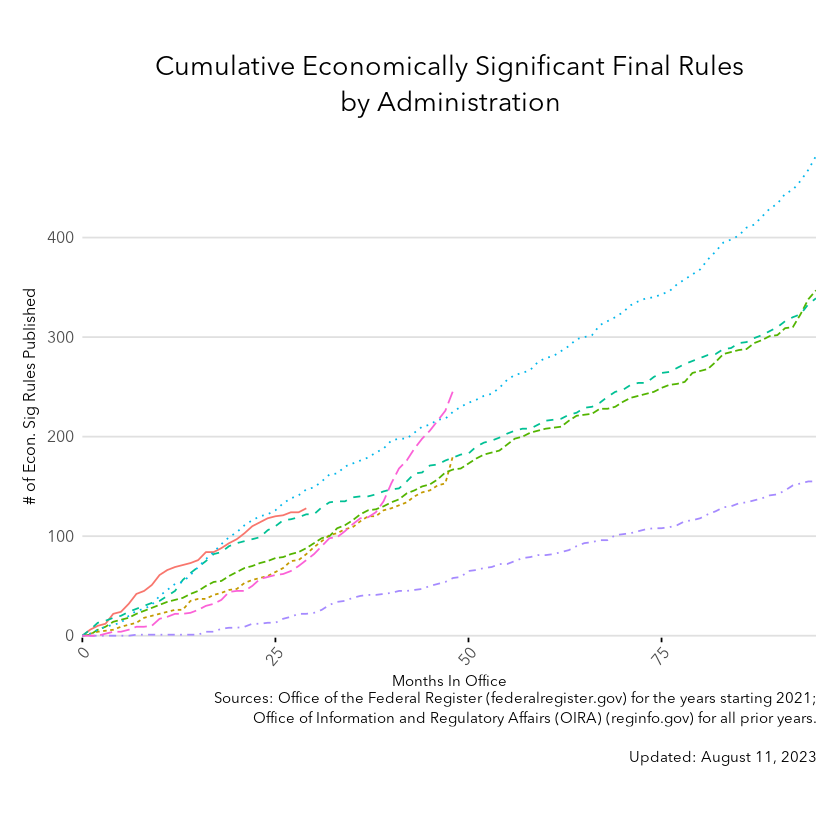

In [87]:
# Cumulative Economically Significant Final Rules by Administration

# clean environment
rm(list = ls())


# load data
#cum_sig <- read.csv("/Users/henryhirsch/Henry/Work/2023/Regulatory Studies Center/projects/project 2 (regstats graphs)/cum_sig_rules/Cumulative_ES_rules_published_months_in_office_071023.csv", skip = 1)
cum_sig <- read.csv("/content/Cumulative_ES_rules_published_months_in_office_071023.csv")

# # rename columns (will need to manually update with the names of new presidents)
colnames(cum_sig) <- c("month", "months_in_office", "Reagan", "Bush_41", "Clinton", "Bush_43", "Obama", "Trump", "Biden")

# # get rid of unnecessary columns (will also need to manually update with new president names here)
cum_sig <- cum_sig[ , c("months_in_office", "Reagan", "Bush_41", "Clinton", "Bush_43", "Obama", "Trump", "Biden")]

# # get rid of unnecessary rows (this would need to be altered if a president served more than two terms)
cum_sig <- cum_sig[-c(98:101), ]

# Data preparation
df <- cum_sig %>%
  select(months_in_office, Reagan, Bush_41, Clinton, Bush_43, Obama, Trump, Biden) %>%
  gather(key = "variable", value = "value", -months_in_office)


# remove firrst row
df <- df[c(2:686), ]

# remove NA (173)
df<- df[complete.cases(df), ]

#str(df) check structure of df

# convert chr to num
df$months_in_office<- as.numeric(df$months_in_office)
df$value <- as.numeric(df$value)

#line
current_date <- format(Sys.Date(), "%B %d, %Y")

caption_text <- paste("Sources: Office of the Federal Register (federalregister.gov) for the years starting 2021;\n       Office of Information and Regulatory Affairs (OIRA) (reginfo.gov) for all prior years.\n\nUpdated:", current_date)
line1 <- ggplot(df, aes(x = months_in_office, y = value)) +
  geom_line(aes(color = variable, linetype = variable)) +
  # annotation_custom(l, xmin = -30, xmax = 40, ymin = -20, ymax = -40) + # for logo
  # coord_cartesian(clip = "off") +
  theme_minimal() +
  theme(
         plot.title = element_text(hjust = 0.5, vjust=-2, margin = margin(b = 40, unit = "pt"), size=20),
         axis.text.x = element_text(angle = 50, hjust = 1, vjust = 1,size=12),
         legend.position = "none",
         panel.grid.major.x = element_blank(),
         axis.text.y = element_text(size=12),
         axis.title.y = element_text(size = 12, angle = 90, vjust = 1),
         panel.grid.major.y = element_line(color = "#E0E0E0", linetype = "solid"),
         panel.grid.minor = element_blank(),
         text =element_text(family = "avenir_lt_pro"),
         plot.caption = element_text(hjust = 1, margin = margin(t = 0, l = 6, unit = "pt"),size=11),
         plot.margin = unit(c(1, 1, 3, 1), "lines"),

         axis.ticks.x = element_line()
    )+
  labs(caption = caption_text)+
  xlab("Months In Office") +
  ylab("# of Econ. Sig Rules Published") +
  ggtitle("Cumulative Economically Significant Final Rules \nby Administration") +
  labs(color = "President")+
  scale_y_continuous(#breaks = seq(0, max(df$value)+50, by = 50),
                     expand = c(0, 0),
                     limits = c(-2, max(df$value) + 50)) +
  scale_x_continuous(#breaks = seq(0, max(df$months_in_office), by = 4),
                     expand = c(0, 0),
                     limits = c(0, max(df$months_in_office)))
line1

- logo is very small
- legend is missing
- the interval of x-axis and y-axis